<a href="https://colab.research.google.com/github/yasamanasgarii/Computer-vision/blob/main/Pyramid%20blending-Feather%20blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feather blending

#### First example
- photo source: Bird
- photp target : park

First we are going to load some libraries.\
These are :
* CV2
* numpy
* PIL

In [387]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
from os import path

We load our images by cv2 and method imread:


```
Image=cv2.imread(image address, cv2.IMREAD_COLOR)
```



In [325]:
bird=cv2.imread('bird.jpg', cv2.IMREAD_COLOR)
park=cv2.imread('park.jpg', cv2.IMREAD_COLOR)

The first photo is the **target** and the second one is the **source**.

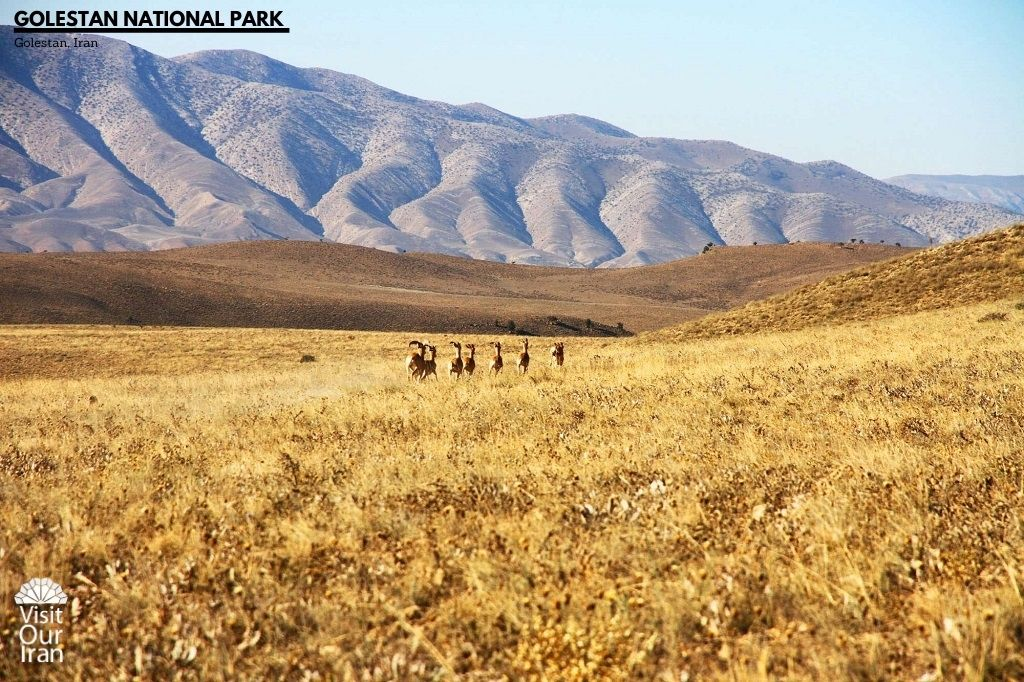

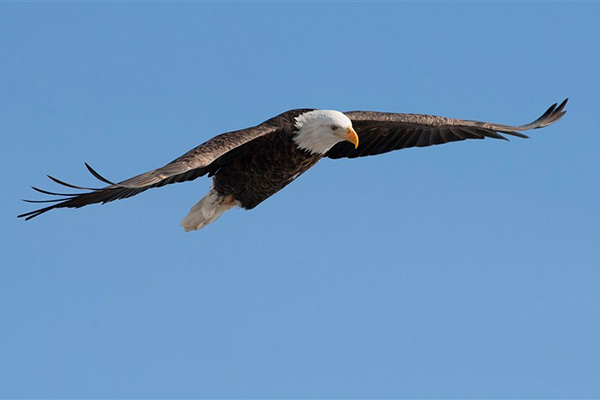

First we are going to resize the image and then make the mask. As both skys are similar the mask would be easy.

The width and height of an image come from this method:


```
width , height=image.shape
```
Then we resize the image with new dimension as **dim** with method:



```
 cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
```



In [257]:
width = int(bird.shape[1]/6)
height = int(bird.shape[0]/6)
dim = (width, height)
# resize image
resized = cv2.resize(bird, dim, interpolation = cv2.INTER_AREA)

We have also a mask by defintion.\
We load it by the method introduced above

In [457]:
new_mask=cv2.imread('neww_mask.jpg', cv2.IMREAD_COLOR)

We use **erosion** from image morphology.\
The method has a kernel:


```
kernel = np.ones((5,5),np.uint8)
```
And we this kernel we apply the erosion:


```
erosion = cv2.erode(new_mask,kernel,iterations = 1)
```




In [458]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(new_mask,kernel,iterations = 1)

We should use the guassian blur to smooth the edges.


In [459]:
blur=cv2.blur(erosion , (10 , 10))

Now it's time to use the method:


```
result=target* (1 - mask)+source*mask
```
For better accuracy we convert float numbers between 0 , 1 with method **casting**:


```
Image.astype('float') / 255.
```




In [460]:
mask_blurred = blur.astype('float') / 255.
new_bird_float = new_bird.astype('float') / 255.
park_float = park.astype('float') / 255.
out=park_float* (1 - mask_blurred)+new_bird_float*mask_blurred
out_park_golestan = (out * 255).astype('uint8')

Time to write the result!

In [391]:
cv2.imwrite(path.join('', 'res21.jpg'), out_park_golestan)

True

#### Second exmaple
* source image : PNG phoneix
* target image: mountain


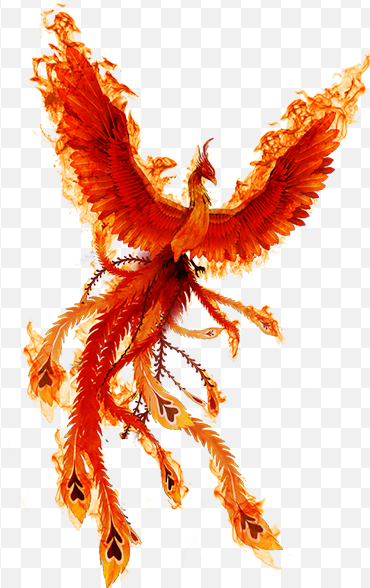

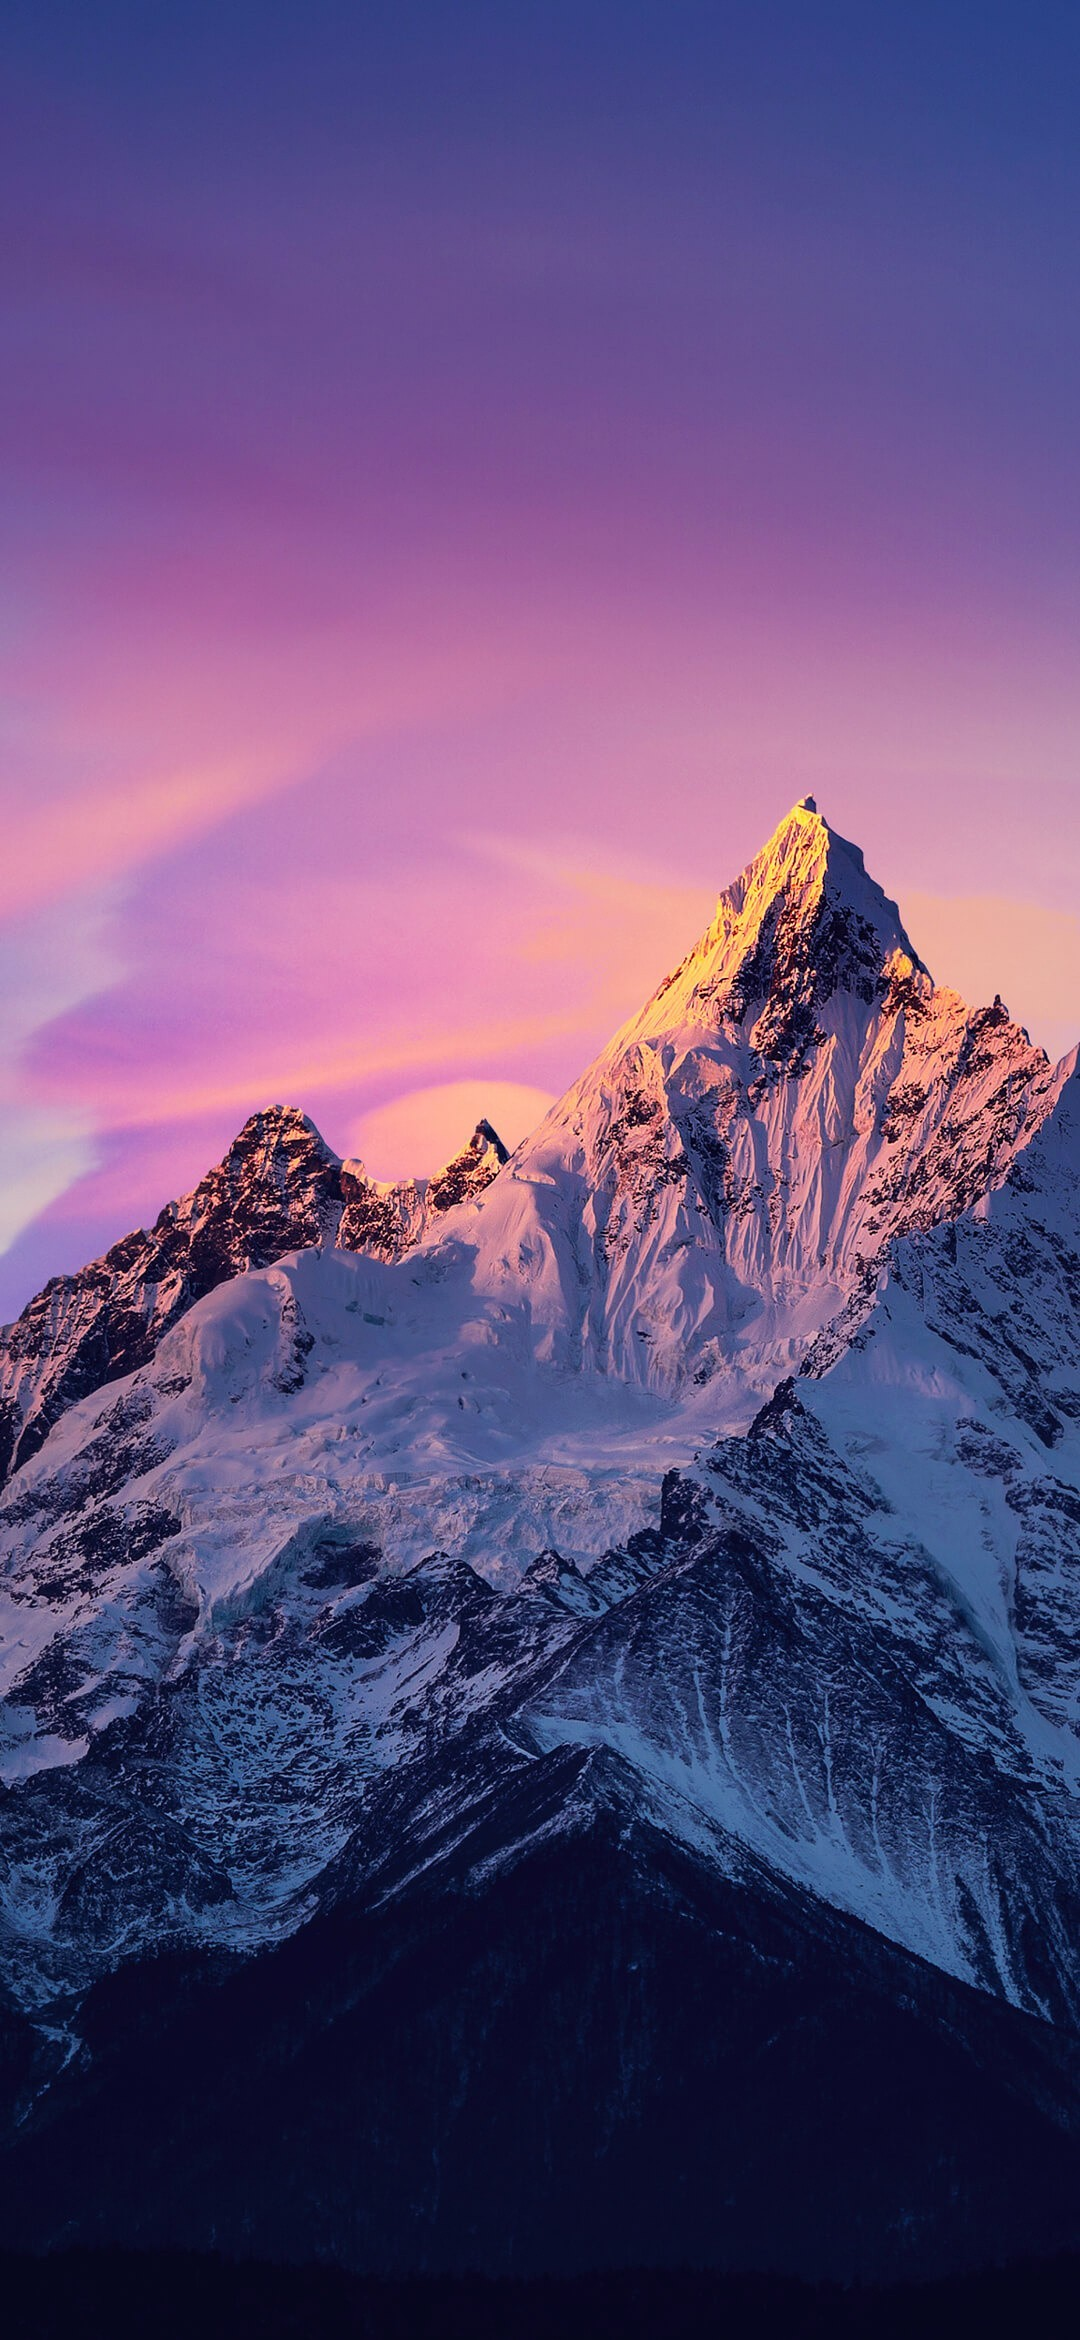


For png photos we have 4 channels. So we use the method down to load a png if we want the 4th channel.
```
cv2.imread('image.png', cv2.IMREAD_UNCHANGED)
```



In [478]:
mountain=cv2.imread('mountain.jpg', cv2.IMREAD_COLOR)
pho=cv2.imread('output-onlinepngtools.png', cv2.IMREAD_UNCHANGED)
r , g , b , alpha=cv2.split(pho)
pho2=cv2.imread('output-onlinepngtools.png', cv2.IMREAD_COLOR)

In [533]:
offset=(400,400)
new_pho=np.zeros((mountain.shape))
for j in np.arange(offset[0] , offset[0]+pho.shape[1],1):
  for i in np.arange(offset[1],offset[1]+pho.shape[0],1):
    new_pho[i][j][:]=pho2[i-offset[1]][j-offset[0]][:]

In [518]:
offset=(400,400)
mask=np.zeros((mountain.shape))
for j in np.arange(offset[0] , offset[0]+alpha.shape[1],1):
  for i in np.arange(offset[1],offset[1]+alpha.shape[0],1):
    mask[i][j][:]=alpha[i-offset[1]][j-offset[0]]

In [534]:
cv2.imwrite(path.join('', 'mask_mou.jpg'), new_pho)
cv2.imwrite(path.join('', 'mask_m.jpg'), mask)

True

In [536]:
new_mask=cv2.imread('mask_m.jpg', cv2.IMREAD_COLOR)
new_pho=cv2.imread('mask_mou.jpg', cv2.IMREAD_COLOR)

In [523]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(new_mask,kernel,iterations = 1)
blur = cv2.blur(erosion,(5,5))  

In [486]:
mask_blurred = blur.astype('float') / 255.
new_pho_float= new_pho.astype('float') / 255.
mountain_float = mountain.astype('float') / 255.
out=mountain_float* (1 - mask_blurred)+new_pho_float*mask_blurred
out_mountain = (out * 255).astype('uint8')

In [451]:
from os import path
cv2.imwrite(path.join('', 'result.jpg'), out_mountain)

True

# Pyramid blending

We are going to make 3 functions:
1. **gauss_py:**


```
def gauss_py(image, steps):
```

In this function we have 2 arguments:
* image : which is the input 
* steps : which gets levels of pyramids



```
temp = cv2.pyrDown(gauss_pyramid[i])
```
Gives each time the pyramid downside of that image.\
we want to make a list so we make a list contains all the pyramids in each step.



In [579]:
def gauss_py(image,step):
    temp = np.copy(image)
    gauss_pyramid = [temp]
    for i in range(step):
        temp = cv2.pyrDown(gauss_pyramid[i])
        gauss_pyramid.append(temp)           

    return gauss_pyramid 

2. **laplacian_py(gaussian_pyr , step)**\
we generate laplacian pyramid by use gaussin pyramid and function 

```
cv2.pyrUp(image, dstsize = size) 
```
We first reverse the list of guassian blur and we just make the next image by method in python cv2.\
we do subtraction to generate laplacian pyramid.

```
cv2.subtract(`gauss_back`[i+1],L_temp) 
```




In [663]:
def laplacian_py(gaussian_pyr, step):
    lap_pyramid = [gaussian_pyr[step-1]]    

    for i in range(step-1,0,-1):
        dim = (gaussian_pyr[i-1].shape[1], gaussian_pyr[i-1].shape[0]) 
        temp = cv2.pyrUp(gaussian_pyr[i], dstsize = dim)          
                                                                    
        ans = cv2.subtract(gaussian_pyr[i-1],temp)         
        lap_pyramid.append(ans)                                

    return lap_pyramid 

3.**combine(gauss_py, laplace_src, laplace_tar,step)**

> Method


create an empty object for record the combined pyramid image
combined laplacian image with the mask.\
In each step to control the overflow we add the laplacian of target for each pixel if the intensity is greater that 128.\
Then we combine the two laplacian and the combined one.\
Now we make the image bigger with cv2.*pyrUp*





In [649]:
def combine(gauss_py, laplace_src, laplace_tar,step): 
    combined_result = [] 
    for i in range(step):
        x, y = np.shape(gauss_py[step-1-i])
        combined_img = laplace_src[i]
        for j in range (x) :
            for k in range (y):
                if gauss_py[step-1-i][j, k] > 128:
                    combined_img[j, k] = laplace_tar[i][j, k]

        combined_result.append(combined_img)
    res = combined_result[0] 
    for i in range(1,step):
        dim = (combined_result[i].shape[1], combined_result[i].shape[0]) 
        res = cv2.pyrUp(res, dstsize = dim)                  
        res = cv2.add(res, combined_result[i])               
    return res 

In [661]:
def result_im(background,target,mask , step):
  gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

  gauss_background = gauss_py(background,step) 
  gauss_target = gauss_py(target,step)        
  gauss_mask = gauss_py(gray_mask,step)         

  lap_background = laplacian_py(gauss_background,step) 
  lap_target = laplacian_py(gauss_target,step)         
  lap_mask = laplacian_py(gauss_mask,step)             

    
  result = combine(gauss_mask, lap_background, lap_target,step)
  return result

In [668]:
result=result_im(mountain,new_pho,new_mask,3)

In [670]:
cv2.imwrite(path.join('', 'result4.jpg'), result)

True

In [222]:
pip install pyamg

     |████████████████████████████████| 6.4MB 4.9MB/s 
     |████████████████████████████████| 194kB 41.7MB/s 


In [223]:
import numpy as np
import scipy.sparse
import PIL.Image
import pyamg

def prepare_mask(mask):
    if type(mask[0][0]) is np.ndarray:
        result = np.ndarray((mask.shape[0], mask.shape[1]), dtype=np.uint8)
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                if sum(mask[i][j]) > 0:
                    result[i][j] = 1
                else:
                    result[i][j] = 0
        mask = result
    return mask

def blend(img_target, img_source, img_mask, offset=(0, 0)):
    # compute regions to be blended
    region_source = (
            max(-offset[0], 0),
            max(-offset[1], 0),
            min(img_target.shape[0]-offset[0], img_source.shape[0]),
            min(img_target.shape[1]-offset[1], img_source.shape[1]))
    region_target = (
            max(offset[0], 0),
            max(offset[1], 0),
            min(img_target.shape[0], img_source.shape[0]+offset[0]),
            min(img_target.shape[1], img_source.shape[1]+offset[1]))
    region_size = (region_source[2]-region_source[0], region_source[3]-region_source[1])

    # clip and normalize mask image
    img_mask = img_mask[region_source[0]:region_source[2], region_source[1]:region_source[3]]
    img_mask = prepare_mask(img_mask)
    img_mask[img_mask==0] = False
    img_mask[img_mask!=False] = True

    # create coefficient matrix
    A = scipy.sparse.identity(np.prod(region_size), format='lil')
    for y in range(region_size[0]):
        for x in range(region_size[1]):
            if img_mask[y,x]:
                index = x+y*region_size[1]
                A[index, index] = 4
                if index+1 < np.prod(region_size):
                    A[index, index+1] = -1
                if index-1 >= 0:
                    A[index, index-1] = -1
                if index+region_size[1] < np.prod(region_size):
                    A[index, index+region_size[1]] = -1
                if index-region_size[1] >= 0:
                    A[index, index-region_size[1]] = -1
    A = A.tocsr()
    
    # create poisson matrix for b
    P = pyamg.gallery.poisson(img_mask.shape)

    # for each layer (ex. RGB)
    for num_layer in range(img_target.shape[2]):
        # get subimages
        t = img_target[region_target[0]:region_target[2],region_target[1]:region_target[3],num_layer]
        s = img_source[region_source[0]:region_source[2], region_source[1]:region_source[3],num_layer]
        t = t.flatten()
        s = s.flatten()

        # create b
        b = P * s
        for y in range(region_size[0]):
            for x in range(region_size[1]):
                if not img_mask[y,x]:
                    index = x+y*region_size[1]
                    b[index] = t[index]

        # solve Ax = b
        x = pyamg.solve(A,b,verb=False,tol=1e-10)

        # assign x to target image
        x = np.reshape(x, region_size)
        x[x>255] = 255
        x[x<0] = 0
        x = np.array(x, img_target.dtype)
        img_target[region_target[0]:region_target[2],region_target[1]:region_target[3],num_layer] = x

    return img_target



In [230]:
img_mask = np.asarray(PIL.Image.open('test1_mask.png'))
mas=np.copy(img_mask)
img_source = np.asarray(PIL.Image.open('test1_src.png'))
sou=np.copy(img_source)
img_target = np.asarray(PIL.Image.open('test1_target.png'))
tar=np.copy(img_target)
img_ret = blend(tar, sou, mas, offset=(40,-30))
img_ret = PIL.Image.fromarray(np.uint8(img_ret))
img_ret.save('test1_ret.png')